In [1]:
import  os, time
import numpy as np
import nibabel as nib
from sklearn.feature_extraction.image import extract_patches
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
if 'patches3D' not in os.listdir(os.curdir):
        os.mkdir('patches3D')
patch_size = 64
extractionStep = 32

<h1> Save High Resolution Train Image Patches

In [ ]:
trainImgPath = 'MRIdataset/VSI/TrainingSet/'
trainImgdir = os.listdir(trainImgPath)
patchesTrainImgAll = np.empty(shape=[0, patch_size, patch_size, patch_size], dtype='float32')

for trainImageName in trainImgdir:
    start = time.time()
    nameImgVol = trainImageName + '_t1.nii.gz'
    pathImgVol = os.path.join(trainImgPath, trainImageName, nameImgVol)
    print('Currently Processing')
    print(pathImgVol)
    print('-' * 60)
    img = nib.load(pathImgVol)
    imgData = img.get_fdata().transpose(1, 0, 2)
    imgData = np.squeeze(imgData)
    imgData *= 1.0/np.max(imgData)  
    print (imgData.shape)

    patchesReturnedImg=extract_patches(imgData, patch_shape=(patch_size, patch_size, patch_size), extraction_step=(extractionStep, extractionStep, extractionStep))    
    x = []; y = []; z = []

    for i in range(0, patchesReturnedImg.shape[0]):
        for j in range(0, patchesReturnedImg.shape[1]):
             for k in range(0, patchesReturnedImg.shape[2]):
                    cubeSum = np.sum(patchesReturnedImg[i,j,k,patch_size-2:patch_size+2,patch_size-2:patch_size+2,patch_size-2:patch_size+2])
                    if cubeSum > 0:
                        x.append(i)
                        y.append(j)
                        z.append(k)

    allImgPatches = patchesReturnedImg[x, y, z, :, :, :]
    print (allImgPatches.shape)
    patchesTrainImgAll = np.append(patchesTrainImgAll, allImgPatches, axis=0)

    end = time.time()
    print("Elapsed time in seconds: %g" % (end - start))


#patchesTrainImgAll = patchesTrainImgAll.astype('float32')
patchesTrainImgAll = np.expand_dims(patchesTrainImgAll, axis=4)

print (patchesTrainImgAll.shape)
np.save('patches3D/patchesTrainImgHR.npy', patchesTrainImgAll)      
del patchesTrainImgAll


<h1> Save High Resolution Validation Image Patches

In [ ]:
valImgPath = 'MRIdataset/VSI/ValidationSet/'
valImgdir = os.listdir(valImgPath)
patchesvalImgAll = np.empty(shape=[0, patch_size, patch_size, patch_size], dtype='float32')

for valImageName in valImgdir:
    start = time.time()
    nameImgVol = valImageName + '_t1.nii.gz'
    pathImgVol = os.path.join(valImgPath, valImageName, nameImgVol)
    print('Currently Processing')
    print(pathImgVol)
    print('-' * 60)
    img = nib.load(pathImgVol)
    imgData = img.get_fdata().transpose(1, 0, 2)
    imgData = np.squeeze(imgData)
    imgData *= 1.0/np.max(imgData)  
    print (imgData.shape)
    patchesReturnedImg=extract_patches(imgData, patch_shape=(patch_size, patch_size, patch_size), extraction_step=(extractionStep, extractionStep, extractionStep))    
    x = []; y = []; z = []

    for i in range(0, patchesReturnedImg.shape[0]):
        for j in range(0, patchesReturnedImg.shape[1]):
             for k in range(0, patchesReturnedImg.shape[2]):
                    cubeSum = np.sum(patchesReturnedImg[i,j,k,patch_size-2:patch_size+2,patch_size-2:patch_size+2,patch_size-2:patch_size+2])
                    if cubeSum > 0:
                        x.append(i)
                        y.append(j)
                        z.append(k)

    allImgPatches = patchesReturnedImg[x, y, z, :, :, :]
    print (allImgPatches.shape)
    patchesvalImgAll = np.append(patchesvalImgAll, allImgPatches, axis=0)

    end = time.time()
    print("Elapsed time in seconds: %g" % (end - start))


#patchesvalImgAll = patchesvalImgAll.astype('float32')
patchesvalImgAll = np.expand_dims(patchesvalImgAll, axis=4)
print (patchesvalImgAll.shape)
np.save('patches3D/patchesvalImgHR.npy', patchesvalImgAll)      
del patchesvalImgAll


<h1> Create Low Resolution Train Image Patches

In [3]:
# 50% Down Sampling by FFT
def getLR(hr_data):
    imgfft = np.fft.fftn(hr_data)
    aftershift=np.fft.fftshift(imgfft)
    aftershift[0:23,0:23,0:23] = 0
    aftershift[40:64,40:64,40:64] = 0
    imgifft = np.fft.ifftn(aftershift)
    img_out = abs(imgifft)
    img_out *= 1.0/np.max(img_out)  
    return img_out

In [4]:
trainImgPath = 'MRIdataset/VSI/TrainingSet/'
trainImgdir = os.listdir(trainImgPath)
patchesTrainImgAll = np.empty(shape=[0, patch_size, patch_size, patch_size], dtype='float32')

for trainImageName in trainImgdir:
    start = time.time()
    nameImgVol = trainImageName + '_t1.nii.gz'
    pathImgVol = os.path.join(trainImgPath, trainImageName, nameImgVol)
    print('Currently Processing')
    print(pathImgVol)
    print('-' * 60)
    img = nib.load(pathImgVol)
    imgData = img.get_fdata().transpose(1, 0, 2)
    imgData = np.squeeze(imgData)
    imgData *= 1.0/np.max(imgData)  
    print (imgData.shape)
    
    patchesReturnedImg=extract_patches(imgData, patch_shape=(patch_size, patch_size, patch_size), extraction_step=(extractionStep, extractionStep, extractionStep))    
    x = []; y = []; z = []

    for i in range(0, patchesReturnedImg.shape[0]):
        for j in range(0, patchesReturnedImg.shape[1]):
             for k in range(0, patchesReturnedImg.shape[2]):
                    cubeSum = np.sum(patchesReturnedImg[i,j,k,patch_size-2:patch_size+2,patch_size-2:patch_size+2,patch_size-2:patch_size+2])
                    if cubeSum > 0:
                        x.append(i)
                        y.append(j)
                        z.append(k)

    allImgPatches = patchesReturnedImg[x, y, z, :, :, :]
    
   
    patchesTrainImgLR = np.empty(shape=[0, patch_size, patch_size, patch_size], dtype='float32')
    
    
    for ii in range (allImgPatches.shape[0]):
        dataHR = allImgPatches[ii,:,:,:]
        dataLR= getLR(dataHR)
        dataLR=np.expand_dims(dataLR, axis=0)
        patchesTrainImgLR = np.append(patchesTrainImgLR, dataLR, axis=0)  
        
    print (patchesTrainImgLR.shape)
    print (patchesTrainImgLR.dtype)
    patchesTrainImgAll = np.append(patchesTrainImgAll, patchesTrainImgLR, axis=0)

    end = time.time()
    print("Elapsed time in seconds: %g" % (end - start))


#patchesTrainImgAll = patchesTrainImgAll.astype('float32')
patchesTrainImgAll = np.expand_dims(patchesTrainImgAll, axis=4)
print (patchesTrainImgAll.shape)
np.save('patches3D/patchesTrainImgLR.npy', patchesTrainImgAll)      
del patchesTrainImgAll


Currently Processing
MRIdataset/VSI/TrainingSet/11\11_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 26.1473
Currently Processing
MRIdataset/VSI/TrainingSet/12\12_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 27.161
Currently Processing
MRIdataset/VSI/TrainingSet/14\14_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 27.0556
Currently Processing
MRIdataset/VSI/TrainingSet/15\15_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 27.1993
Currently Processing
MRIdataset/VSI/TrainingSet/2\2_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 27.0546
Cur

<h1> Create Low Resolution Validation Set

In [5]:
valImgPath = 'MRIdataset/VSI/ValidationSet/'
valImgdir = os.listdir(valImgPath)
patchesvalImgAll = np.empty(shape=[0, patch_size, patch_size, patch_size], dtype='float32')

for valImageName in valImgdir:
    start = time.time()
    nameImgVol = valImageName + '_t1.nii.gz'
    pathImgVol = os.path.join(valImgPath, valImageName, nameImgVol)
    print('Currently Processing')
    print(pathImgVol)
    print('-' * 60)
    img = nib.load(pathImgVol)
    imgData = img.get_fdata().transpose(1, 0, 2)
    imgData = np.squeeze(imgData)
    imgData *= 1.0/np.max(imgData)  
    print (imgData.shape)

    patchesReturnedImg=extract_patches(imgData, patch_shape=(patch_size, patch_size, patch_size), extraction_step=(extractionStep, extractionStep, extractionStep))    
    x = []; y = []; z = []

    for i in range(0, patchesReturnedImg.shape[0]):
        for j in range(0, patchesReturnedImg.shape[1]):
             for k in range(0, patchesReturnedImg.shape[2]):
                    cubeSum = np.sum(patchesReturnedImg[i,j,k,patch_size-2:patch_size+2,patch_size-2:patch_size+2,patch_size-2:patch_size+2])
                    if cubeSum > 0:
                        x.append(i)
                        y.append(j)
                        z.append(k)

    allImgPatches = patchesReturnedImg[x, y, z, :, :, :]
    
   
    patchesvalImgLR = np.empty(shape=[0, patch_size, patch_size, patch_size], dtype='float32')
    
    
    for ii in range (allImgPatches.shape[0]):
        dataHR = allImgPatches[ii,:,:,:]
        dataLR= getLR(dataHR)
        dataLR=np.expand_dims(dataLR, axis=0)
        patchesvalImgLR = np.append(patchesvalImgLR, dataLR, axis=0)  
        
    print (patchesvalImgLR.shape)
    print (patchesvalImgLR.dtype)
    patchesvalImgAll = np.append(patchesvalImgAll, patchesvalImgLR, axis=0)

    end = time.time()
    print("Elapsed time in seconds: %g" % (end - start))


#patchesvalImgAll = patchesvalImgAll.astype('float32')
patchesvalImgAll = np.expand_dims(patchesvalImgAll, axis=4)
print (patchesvalImgAll.shape)
np.save('patches3D/patchesvalImgLR.npy', patchesvalImgAll)      
del patchesvalImgAll


Currently Processing
MRIdataset/VSI/ValidationSet/1\1_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 25.8978
Currently Processing
MRIdataset/VSI/ValidationSet/10\10_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 26.3299
Currently Processing
MRIdataset/VSI/ValidationSet/13\13_t1.nii.gz
------------------------------------------------------------
(256, 240, 192)
(210, 64, 64, 64)
float64
Elapsed time in seconds: 28.1943
(630, 64, 64, 64, 1)


<h1> Visualize HR and LR Patches

In [6]:
HRpatch = np.load('patches3D/patchesTrainImgHR.npy')
LRpatch =  np.load('patches3D/patchesTrainImgLR.npy')
print (HRpatch.shape)
print (HRpatch.dtype)
print (LRpatch.dtype)
print (np.max(HRpatch))
print (np.max(LRpatch))

(2100, 64, 64, 64, 1)
float64
float64
1.0
1.0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


(64, 64, 64)


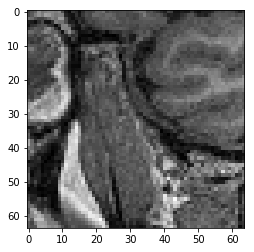

In [8]:
imageSliceHR = HRpatch[100,:,:,:,:]
imageSliceHR = np.squeeze(imageSliceHR)
print (imageSliceHR.shape)
imgplot = plt.imshow(imageSliceHR[:,:,50], cmap='gray')


(64, 64, 64)


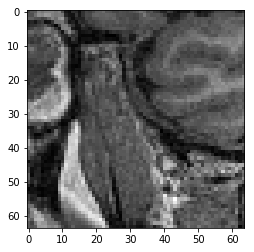

In [9]:
imageSliceLR = LRpatch[100,:,:,:,:]
imageSliceLR = np.squeeze(imageSliceLR)
print (imageSliceLR.shape)
imgplot = plt.imshow(imageSliceLR[:,:,50], cmap='gray')


In [13]:
def psnr(y_true, y_pred):
        """
    PSNR is Peek Signal to Noise Ratio, which is similar to mean squared error.
    It can be calculated as
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE)
    When providing an unscaled input, MAXp = 255. Therefore 20 * log10(255)== 48.1308036087.
    However, since we are scaling our input, MAXp = 1. Therefore 20 * log10(1) = 0.
    Thus we remove that component completely and only compute the remaining MSE component.
    """
    assert y_true.shape == y_pred.shape, "Cannot calculate PSNR. Input shapes not same." \
                                         " y_true shape = %s, y_pred shape = %s" % (str(y_true.shape),
                                                                                   str(y_pred.shape))

    return -10. * tf.math.log(np.mean(np.square(y_pred - y_true)))


In [16]:
result= psnr(imageSliceHR, imageSliceLR)
print (result)